<a href="https://colab.research.google.com/github/kr1k-boop/DA-Project/blob/main/Models_DAProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
!pip install regressors

  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12400 sha256=f9e9700818010534eb410e45af17343ed2fe45409bacecb62897c6e47e65c511
  Stored in directory: /root/.cache/pip/wheels/5e/84/7d/c7f674a24c508709cdd3aa6cf0f129899f21061b2821ceed32
Successfully built regressors


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from regressors import stats    
from sklearn.linear_model import RidgeCV

### Load Dataset

In [3]:
df = pd.read_csv('cleaned_data.csv') 
df = df.drop(['Unnamed: 0'], axis = 1)
print(df.shape)
df.describe()

(429, 57)


,1.1.4) Gender gap in internet access,1.2.2) Average fixed broadband download speed,1.2.7) Bandwidth capacity,1.3.1) Network coverage (min. 2G),1.3.2) Network coverage (min. 3G),1.3.3) Network coverage (min. 4G),1.3.5) Government initiatives to make Wi-Fi available,1.3.6) Private sector initiatives to make Wi-Fi available,1.4.1) Urban electricity access,1.4.2) Rural electricity access,2.1.1) Smartphone cost (handset),2.1.2) Mobile phone cost (prepaid tariff),2.1.3) Mobile phone cost (postpaid tariff),2.1.4) Fixed-line monthly broadband cost,2.2.2) Wireless operators' market share,2.2.3) Broadband operators' market share,3.1.1) Availability of local news in local languages,3.1.2) Concentration of websites using country-level domains,3.1.3) Availability of e-Government services in the local language,3.2.1) e-Finance content,3.2.3) e-Health content,3.2.5) e-Entertainment usage,3.2.6) e-Commerce content,3.2.8) Open data policies,4.1.1) Level of literacy,4.1.2) Educational attainment,4.1.3) Support for digital literacy,4.1.4) Level of web accessibility,4.2.1) Privacy regulations,4.2.2) Trust in online privacy,4.2.3) Trust in Government websites and apps,4.2.4) Trust in Non-government websites and apps,4.2.5) Trust in information from social media,4.2.6) e-Commerce safety,4.3.1.1) Comprehensive female e-inclusion plan,4.3.1.2) Female digital skills training plan,4.3.1.3) Female STEM education plan,4.3.2) Government e-inclusion strategy,4.3.3) National broadband strategy,4.3.4) Funding for broadband buildout,4.3.5) Technology-neutrality policy for spectrum use,4.3.6) National digital identification system,BG2) Population,BG5) GINI coefficient,BG7) Total electricity access,BG9) Percentage of schools with Internet access,BG10) Global Peace Index,BG11) Democracy Index,BG12) Corruption Perceptions Index,BG13) EIU Business Environment Rankings,BG14) UN E-Government Development Index,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG24) Total fixed line broadband subscribers
count,429.000000,429.000000,4.290000e+02,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.00000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,15.687879,39.207133,1.426804e+05,95.944149,86.986760,68.728811,1.596737,1.317016,91.700723,76.791282,49.721212,3.54380,4.325541,26.302168,3812.209790,4475.319347,2.986014,1.841492,1.512821,1.701632,2.244755,87.820047,56.575524,1.337995,85.888578,8.709790,2.461538,1.606061,1.657343,49.634965,48.914219,33.938695,27.240093,57.917483,1.158508,0.351981,0.398601,1.456876,1.850816,0.885781,0.801865,1.783217,66.953147,38.501865,84.463473,60.646853,2.029138,5.796037,45.398601,5.932634,0.600699,6.082284,5.783217,56.037529,6.764211,6.334652,143737.376584
std,18.807892,38.214072,8.785347e+05,7.394996,18.044832,33.534190,0.750756,0.881913,16.405713,34.173803,23.906815,8.53556,6.907891,118.487428,1275.572605,2159.673885,0.988150,1.047049,0.628712,0.458076,0.804922,7.543895,24.896986,0.837205,18.191183,3.157057,0.928036,1.087766,0.727673,13.097008,11.514400,9.400566,9.389780,11.280201,0.921221,0.478146,0.490182,0.730593,0.964864,0.318449,0.399060,0.573641,188.927237,7.567086,26.000086,36.347061,0.453197,2.065359,19.028559,1.301583,0.211303,6.387836,7.644111,29.026809,10.831653,10.566943,141649.182669
min,-16.700000,2.530000,4.990000e+02,50.000000,20.000000,0.000000,0.000000,0.000000,16.400000,0.360000,0.000000,0.00500,0.002000,0.230000,11

In [ ]:
df.columns

Index(['1.1.4) Gender gap in internet access',
       '1.2.2) Average fixed broadband download speed',
       '1.2.7) Bandwidth capacity', '1.3.1) Network coverage (min. 2G)',
       '1.3.2) Network coverage (min. 3G)',
       '1.3.3) Network coverage (min. 4G)',
       '1.3.5) Government initiatives to make Wi-Fi available',
       '1.3.6) Private sector initiatives to make Wi-Fi available',
       '1.4.1) Urban electricity access', '1.4.2) Rural electricity access',
       '2.1.1) Smartphone cost (handset)',
       '2.1.2) Mobile phone cost (prepaid tariff)',
       '2.1.3) Mobile phone cost (postpaid tariff)',
       '2.1.4) Fixed-line monthly broadband cost',
       '2.2.2) Wireless operators' market share',
       '2.2.3) Broadband operators' market share',
       '3.1.1) Availability of local news in local languages',
       '3.1.2) Concentration of websites using country-level domains',
       '3.1.3) Availability of e-Government services in the local language',
       '3.2.1) e

In [ ]:
df_targets = df['BG5) GINI coefficient']

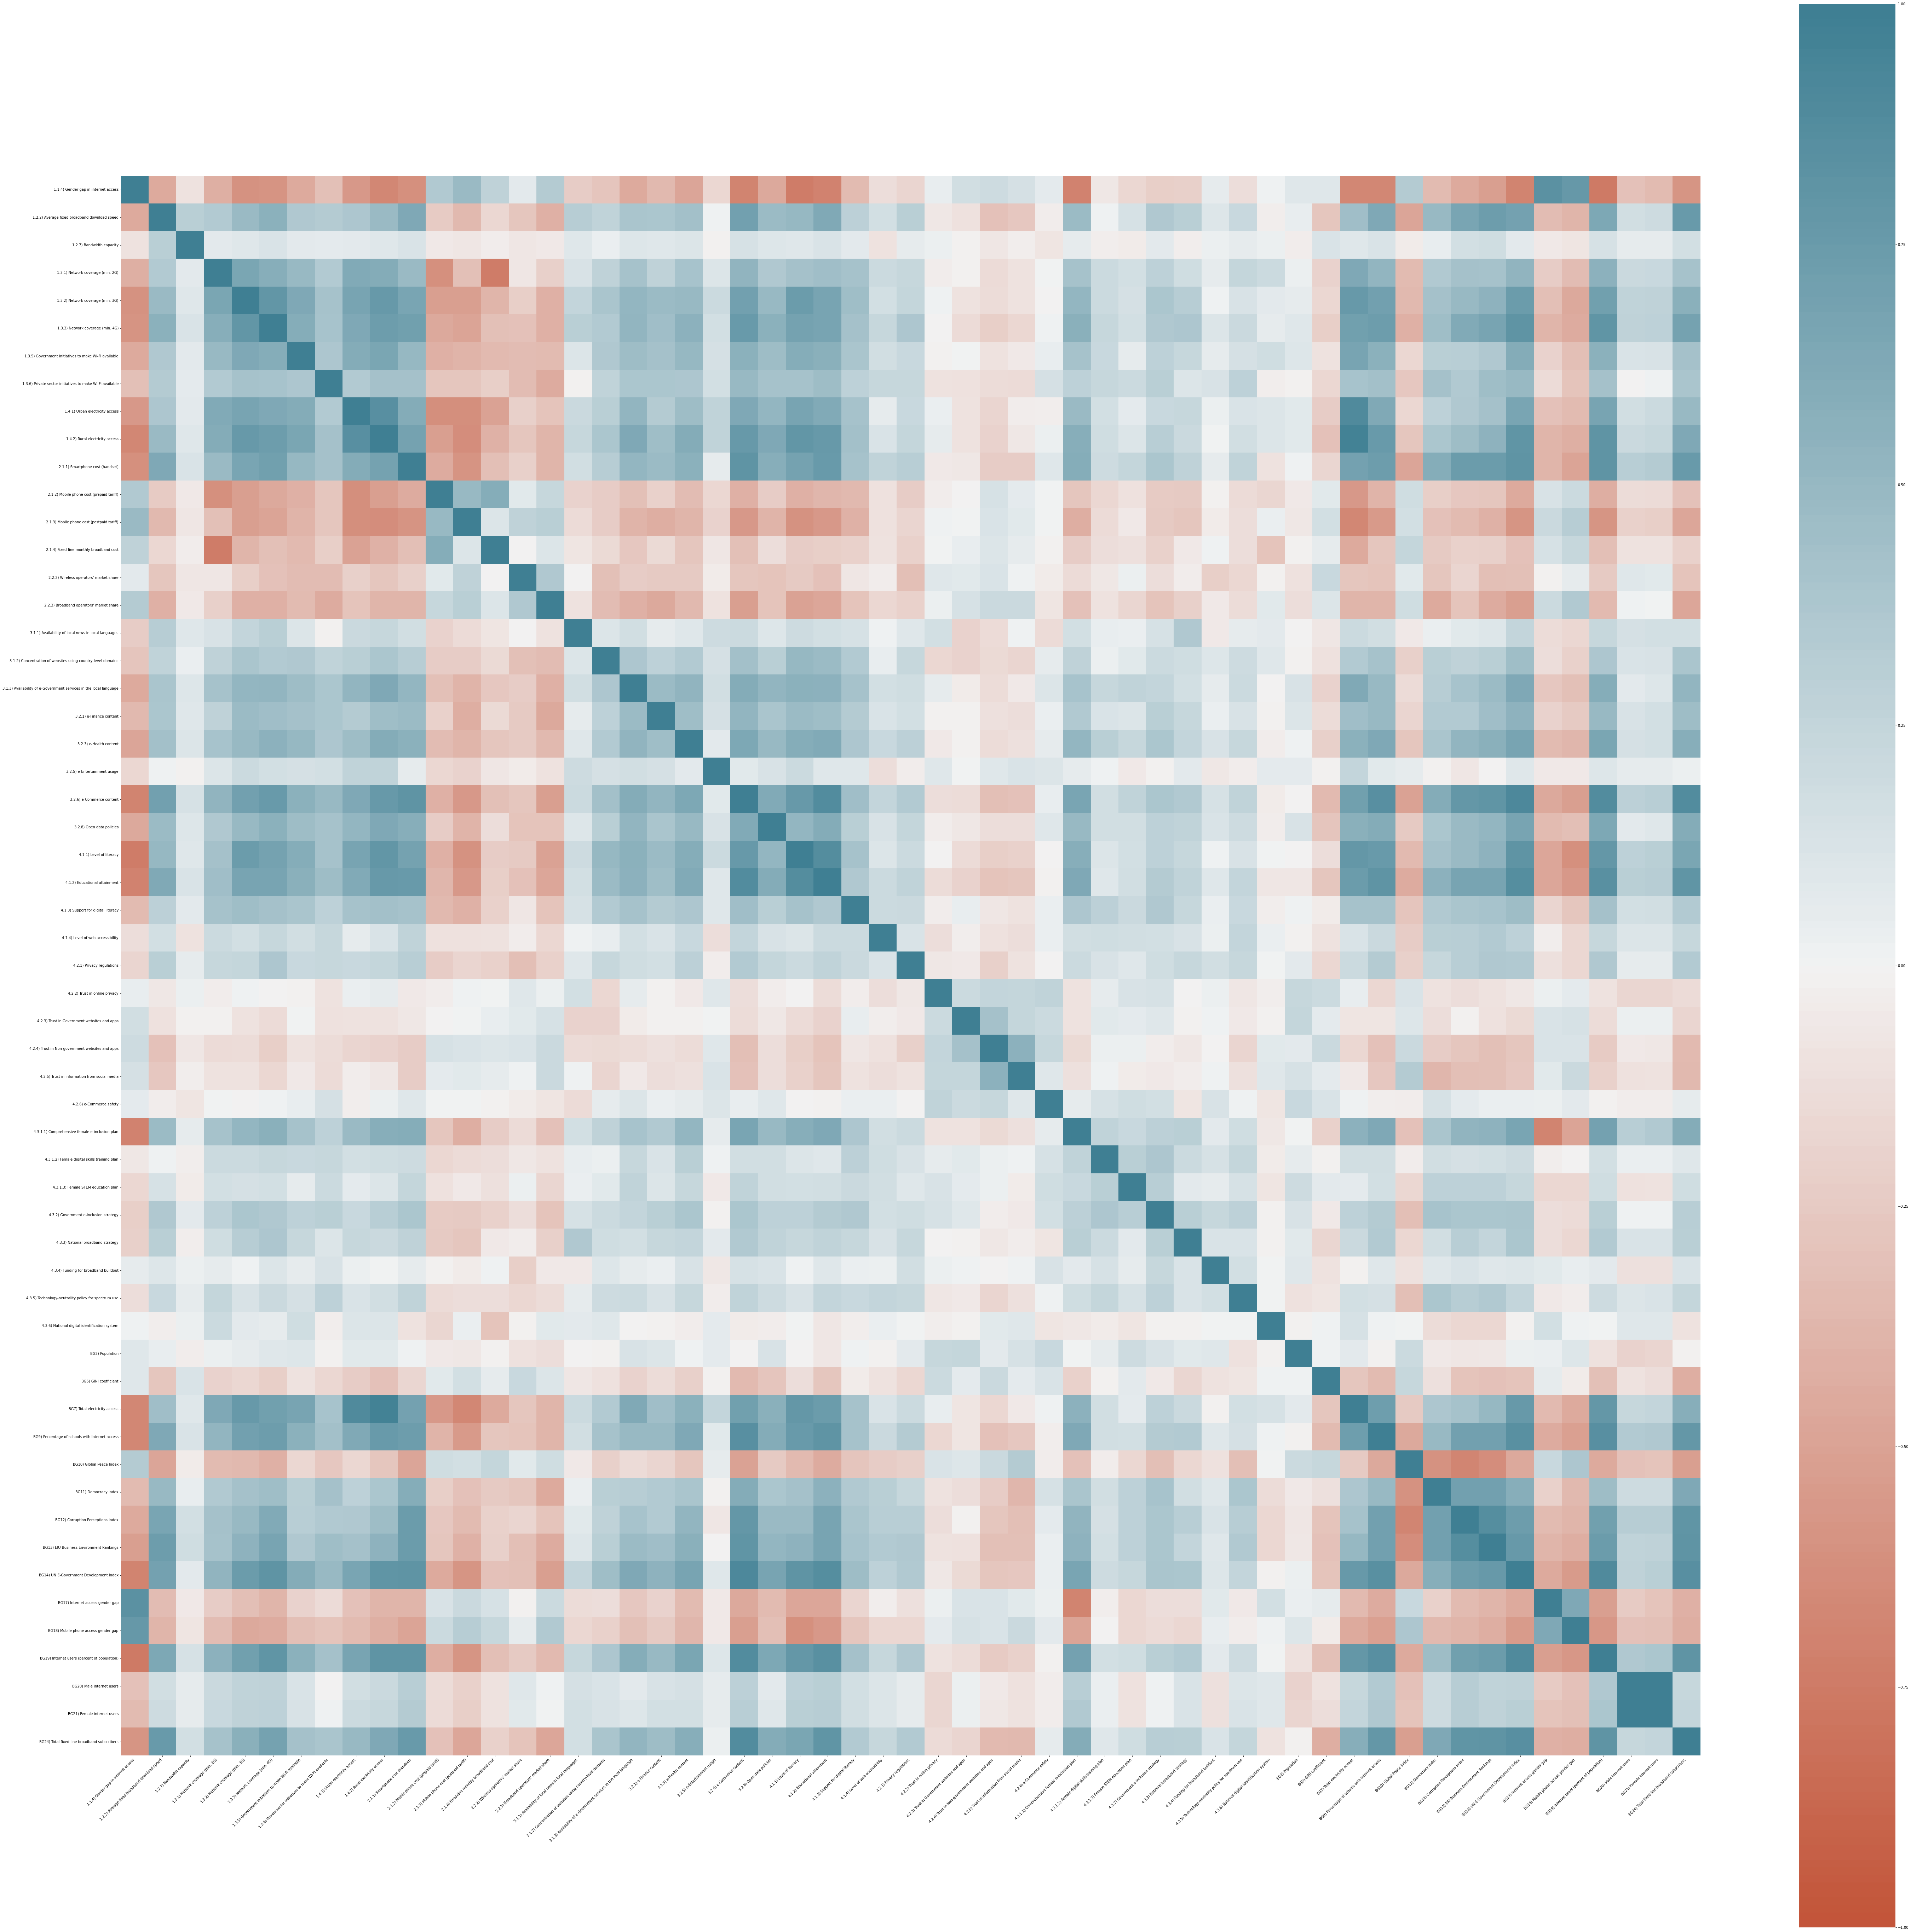

In [10]:
#Creating a correlation matrix and plotting heat map
corr = df.corr()

fig, ax = plt.subplots(figsize = (100, 100))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Separating Target Variables

In [ ]:
y_gini = df['BG5) GINI coefficient']
y_peace = df['BG10) Global Peace Index']
y_dem = df['BG11) Democracy Index']
y_corr = df['BG12) Corruption Perceptions Index']
y_unegov = df['BG14) UN E-Government Development Index']

In [ ]:
target_column = ['BG5) GINI coefficient', 'BG10) Global Peace Index', 'BG11) Democracy Index', 'BG12) Corruption Perceptions Index', 'BG14) UN E-Government Development Index'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,1.1.4) Gender gap in internet access,1.2.2) Average fixed broadband download speed,1.2.7) Bandwidth capacity,1.3.1) Network coverage (min. 2G),1.3.2) Network coverage (min. 3G),1.3.3) Network coverage (min. 4G),1.3.5) Government initiatives to make Wi-Fi available,1.3.6) Private sector initiatives to make Wi-Fi available,1.4.1) Urban electricity access,1.4.2) Rural electricity access,2.1.1) Smartphone cost (handset),2.1.2) Mobile phone cost (prepaid tariff),2.1.3) Mobile phone cost (postpaid tariff),2.1.4) Fixed-line monthly broadband cost,2.2.2) Wireless operators' market share,2.2.3) Broadband operators' market share,3.1.1) Availability of local news in local languages,3.1.2) Concentration of websites using country-level domains,3.1.3) Availability of e-Government services in the local language,3.2.1) e-Finance content,3.2.3) e-Health content,3.2.5) e-Entertainment usage,3.2.6) e-Commerce content,3.2.8) Open data policies,4.1.1) Level of literacy,4.1.2) Educational attainment,4.1.3) Support for digital literacy,4.1.4) Level of web accessibility,4.2.1) Privacy regulations,4.2.2) Trust in online privacy,4.2.3) Trust in Government websites and apps,4.2.4) Trust in Non-government websites and apps,4.2.5) Trust in information from social media,4.2.6) e-Commerce safety,4.3.1.1) Comprehensive female e-inclusion plan,4.3.1.2) Female digital skills training plan,4.3.1.3) Female STEM education plan,4.3.2) Government e-inclusion strategy,4.3.3) National broadband strategy,4.3.4) Funding for broadband buildout,4.3.5) Technology-neutrality policy for spectrum use,4.3.6) National digital identification system,BG2) Population,BG5) GINI coefficient,BG7) Total electricity access,BG9) Percentage of schools with Internet access,BG10) Global Peace Index,BG11) Democracy Index,BG12) Corruption Perceptions Index,BG13) EIU Business Environment Rankings,BG14) UN E-Government Development Index,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG24) Total fixed line broadband subscribers
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.180944,0.192655,0.009918,0.959441,0.869868,0.687288,0.798368,0.658508,0.917007,0.767913,0.497212,0.031102,0.093119,0.024247,0.381221,0.447532,0.746503,0.613831,0.756410,0.850816,0.748252,0.878200,0.586883,0.668998,0.858886,0.617716,0.820513,0.401515,0.828671,0.590892,0.596515,0.547398,0.486430,0.618777,0.579254,0.351981,0.398601,0.728438,0.616939,0.885781,0.801865,0.891608,0.047995,38.501865,0.844635,0.606469,2.029138,5.796037,45.398601,0.697957,0.600699,0.217224,0.098021,0.562061,0.097705,0.096883,0.311936
std,0.216931,0.187775,0.061072,0.073950,0.180448,0.335342,0.375378,0.440956,0.164057,0.341738,0.239068,0.074911,0.148710,0.109230,0.127557,0.215967,0.247037,0.349016,0.314356,0.229038,0.268307,0.075439,0.258267,0.418603,0.181912,0.223905,0.309345,0.271941,0.363836,0.155917,0.140420,0.151622,0.167675,0.120515,0.460611,0.478146,0.490182,0.365297,0.321621,0.318449,0.399060,0.286820,0.135432,7.567086,0.260001,0.363471,0.453197,2.065359,19.028559,0.153127,0.211303,0.228137,0.129561,0.291142,0.156457,0.161612,0.307405
min,-0.192618,0.012432,0.000035,0.500000,0.200000,0.000000,0.000000,0.000000,0.164000,0.003600,0.000000,0.000044,0.000043,0.000212,0.111600,0.139000,0.000000,0.000000,0.000000,0.500000,0.000000,0.640000,0.031120

In [ ]:
X = df[predictors].values

In [ ]:
#y = df[target_column].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
#print(X_train.shape)
#print(X_test.shape)

### Regression with OLS

#### All Variables

GINI Coefficient

In [ ]:
X_gini_train, X_gini_test, y_gini_train, y_gini_test = train_test_split(X, y_gini, test_size=0.20, random_state=40)
print(X_gini_train.shape)
print(X_gini_test.shape)

(343, 52)
(86, 52)


In [ ]:
model_gini = LinearRegression()
model_gini.fit(X_gini_train, y_gini_train)


LinearRegression()

In [ ]:
pred_gini_train_lr= model_gini.predict(X_gini_train)
print("RMSE for training data", np.sqrt(mean_squared_error(y_gini_train,pred_gini_train_lr)))
print("Coefficient of Determination for training data", r2_score(y_gini_train, pred_gini_train_lr))

RMSE for training data 5.141306222843637
Coefficient of Determination for training data 0.5687084286066397


In [ ]:
pred_test_lr= model_gini.predict(X_gini_test)
print("RMSE for testing data", np.sqrt(mean_squared_error(y_gini_test,pred_test_lr))) 
print("Coefficient of Determination for test data", r2_score(y_gini_test, pred_test_lr))

RMSE for testing data 5.5577033400979765
Coefficient of Determination for test data 0.23766888352369364


In [ ]:
variables = list(df[predictors].columns)
coefficients_linear_gini = model_gini.coef_

In [ ]:
for (colname, coef) in zip(variables, coefficients_linear_gini):
  print(colname, ":", coef)

4.3.1.1) Comprehensive female e-inclusion plan : 0.09560214349403014
4.3.1.3) Female STEM education plan : 1.2739208322509468
1.3.5) Government initiatives to make Wi-Fi available : 2.4124268135890876
1.3.1) Network coverage (min. 2G) : -15.720325771597354
4.3.3) National broadband strategy : -1.6528098881737683
BG17) Internet access gender gap : -1.9992555398249623
4.3.1.2) Female digital skills training plan : -0.16274457984205348
2.1.2) Mobile phone cost (prepaid tariff) : 1.3937034733312368
3.1.1) Availability of local news in local languages : -2.357191665403262
3.1.2) Concentration of websites using country-level domains : 0.40700635310353306
BG18) Mobile phone access gender gap : -2.342934707499561
3.2.5) e-Entertainment usage : -2.2669754795682513
4.1.1) Level of literacy : 10.356926155100453
3.2.1) e-Finance content : 2.0949270315111694
1.3.3) Network coverage (min. 4G) : 1.0470212499141294
1.2.2) Average fixed broadband download speed : 5.708760150530146
3.1.3) Availability o

Peace 

In [ ]:
X_peace_train, X_peace_test, y_peace_train, y_peace_test = train_test_split(X, y_peace, test_size=0.20, random_state=40)
print(X_peace_train.shape)
print(X_peace_test.shape)

(343, 52)
(86, 52)


In [ ]:
model_peace = LinearRegression()
model_peace.fit(X_peace_train, y_peace_train)

LinearRegression()

In [ ]:
pred_peace_train_lr= model_peace.predict(X_peace_train)
print("RMSE for training data", np.sqrt(mean_squared_error(y_peace_train,pred_peace_train_lr)))
print("Coefficient of Determination for training data", r2_score(y_peace_train, pred_peace_train_lr))

RMSE for training data 0.27013817127013345
Coefficient of Determination for training data 0.6385740120945793


In [ ]:
pred_peace_test_lr= model_peace.predict(X_peace_test)
print("RMSE for testing data", np.sqrt(mean_squared_error(y_peace_test,pred_peace_test_lr))) 
print("Coefficient of Determination for test data", r2_score(y_peace_test, pred_peace_test_lr))

RMSE for testing data 0.353153423697794
Coefficient of Determination for test data 0.4187569619956226


In [ ]:
coefficients_linear_peace = model_peace.coef_

In [ ]:
for (colname, coef) in zip(variables, coefficients_linear_peace):
  print(colname, ":", coef)

4.3.1.1) Comprehensive female e-inclusion plan : 0.09247977781794899
4.3.1.3) Female STEM education plan : -0.026358015225456194
1.3.5) Government initiatives to make Wi-Fi available : 0.1002492754865564
1.3.1) Network coverage (min. 2G) : 0.3830180294945192
4.3.3) National broadband strategy : -0.04876828789519527
BG17) Internet access gender gap : 0.4918292774534734
4.3.1.2) Female digital skills training plan : 0.04614972180196859
2.1.2) Mobile phone cost (prepaid tariff) : 0.29977288139675895
3.1.1) Availability of local news in local languages : 0.023268637103325496
3.1.2) Concentration of websites using country-level domains : 0.014539749630563842
BG18) Mobile phone access gender gap : 0.330247808572308
3.2.5) e-Entertainment usage : -0.23641301033144824
4.1.1) Level of literacy : -0.8113582296917672
3.2.1) e-Finance content : 0.006238034651071422
1.3.3) Network coverage (min. 4G) : -0.09925645985746662
1.2.2) Average fixed broadband download speed : -0.23916500168478982
3.1.3) A

Democracy

In [ ]:
X_dem_train, X_dem_test, y_dem_train, y_dem_test = train_test_split(X, y_dem, test_size=0.20, random_state=40)
print(X_dem_train.shape)
print(X_dem_test.shape)

(343, 52)
(86, 52)


In [ ]:
model_dem = LinearRegression()
model_dem.fit(X_dem_train, y_dem_train)

LinearRegression()

In [ ]:
pred_dem_train_lr= model_dem.predict(X_dem_train)
print("RMSE for training data", np.sqrt(mean_squared_error(y_dem_train,pred_dem_train_lr)))
print("Coefficient of Determination for training data", r2_score(y_dem_train, pred_dem_train_lr))

RMSE for training data 1.0550753558421688
Coefficient of Determination for training data 0.7302016522060798


In [ ]:
pred_dem_test_lr= model_dem.predict(X_dem_test)
print("RMSE for testing data", np.sqrt(mean_squared_error(y_dem_test,pred_dem_test_lr))) 
print("Coefficient of Determination for test data", r2_score(y_dem_test, pred_dem_test_lr))

RMSE for testing data 1.3491566030497524
Coefficient of Determination for test data 0.6146045068284818


In [ ]:
coefficients_linear_dem = model_dem.coef_

In [ ]:
for (colname, coef) in zip(variables, coefficients_linear_dem):
  print(colname, ":", coef)

4.3.1.1) Comprehensive female e-inclusion plan : 0.24293445132740457
4.3.1.3) Female STEM education plan : 0.4252316947800563
1.3.5) Government initiatives to make Wi-Fi available : -0.060009782064665784
1.3.1) Network coverage (min. 2G) : 0.04875281846902135
4.3.3) National broadband strategy : 0.09407113390435118
BG17) Internet access gender gap : -0.3653539800508193
4.3.1.2) Female digital skills training plan : -0.07230609203964558
2.1.2) Mobile phone cost (prepaid tariff) : 0.6306574098259269
3.1.1) Availability of local news in local languages : -0.12597004554925273
3.1.2) Concentration of websites using country-level domains : -0.019443217855480976
BG18) Mobile phone access gender gap : -1.8426061275196903
3.2.5) e-Entertainment usage : 0.3379513763702493
4.1.1) Level of literacy : -1.7978084021992908
3.2.1) e-Finance content : 0.2041322598817188
1.3.3) Network coverage (min. 4G) : -0.37353729703909977
1.2.2) Average fixed broadband download speed : -0.4764776911052806
3.1.3) Av

Corruption

In [ ]:
X_corr_train, X_corr_test, y_corr_train, y_corr_test = train_test_split(X, y_corr, test_size=0.20, random_state=40)
print(X_corr_train.shape)
print(X_corr_test.shape)

(343, 52)
(86, 52)


In [ ]:
model_corr = LinearRegression()
model_corr.fit(X_corr_train, y_corr_train)

LinearRegression()

In [ ]:
pred_corr_train_lr= model_corr.predict(X_corr_train)
print("RMSE for training data", np.sqrt(mean_squared_error(y_corr_train,pred_corr_train_lr)))
print("Coefficient of Determination for training data", r2_score(y_corr_train, pred_corr_train_lr))

RMSE for training data 6.276188156564592
Coefficient of Determination for training data 0.8887723647443769


In [ ]:
pred_corr_test_lr= model_corr.predict(X_corr_test)
print("RMSE for testing data", np.sqrt(mean_squared_error(y_corr_test,pred_corr_test_lr))) 
print("Coefficient of Determination for test data", r2_score(y_corr_test, pred_corr_test_lr))

RMSE for testing data 7.515046370905156
Coefficient of Determination for test data 0.8546760469574921


In [ ]:
coefficients_linear_corr = model_corr.coef_

In [ ]:
for (colname, coef) in zip(variables, coefficients_linear_corr):
  print(colname, ":", coef)

4.3.1.1) Comprehensive female e-inclusion plan : 0.13089578213680145
4.3.1.3) Female STEM education plan : -0.5549488658899566
1.3.5) Government initiatives to make Wi-Fi available : -1.3677620623444788
1.3.1) Network coverage (min. 2G) : 29.553850720073356
4.3.3) National broadband strategy : 4.878547394343645
BG17) Internet access gender gap : -10.768990392691341
4.3.1.2) Female digital skills training plan : -1.3665776658555142
2.1.2) Mobile phone cost (prepaid tariff) : 3.552097331340244
3.1.1) Availability of local news in local languages : -3.078397525011595
3.1.2) Concentration of websites using country-level domains : -2.8228714840873836
BG18) Mobile phone access gender gap : -5.094051442989558
3.2.5) e-Entertainment usage : -6.2948972508624905
4.1.1) Level of literacy : -18.743758760924567
3.2.1) e-Finance content : -2.1392465278133592
1.3.3) Network coverage (min. 4G) : -0.47750946887332546
1.2.2) Average fixed broadband download speed : -4.403070959284168
3.1.3) Availability

Development

In [ ]:
X_unegov_train, X_unegov_test, y_unegov_train, y_unegov_test = train_test_split(X, y_unegov, test_size=0.20, random_state=40)
print(X_unegov_train.shape)
print(X_unegov_test.shape)

(343, 52)
(86, 52)


In [ ]:
model_unegov = LinearRegression()
model_unegov.fit(X_unegov_train, y_unegov_train)

LinearRegression()

In [ ]:
pred_unegov_train_lr= model_unegov.predict(X_unegov_train)
print("RMSE for training data", np.sqrt(mean_squared_error(y_unegov_train,pred_unegov_train_lr)))
print("Coefficient of Determination for training data", r2_score(y_unegov_train, pred_unegov_train_lr))

RMSE for training data 0.05405306934607914
Coefficient of Determination for training data 0.9333433292090403


In [ ]:
pred_unegov_test_lr= model_unegov.predict(X_unegov_test)
print("RMSE for testing data", np.sqrt(mean_squared_error(y_unegov_test,pred_unegov_test_lr))) 
print("Coefficient of Determination for test data", r2_score(y_unegov_test, pred_unegov_test_lr))

RMSE for testing data 0.06931231784830066
Coefficient of Determination for test data 0.8970568895262877


In [ ]:
coefficients_linear_unegov = model_unegov.coef_

In [ ]:
for (colname, coef) in zip(variables, coefficients_linear_unegov):
  print(colname, ":", coef)

4.3.1.1) Comprehensive female e-inclusion plan : -0.0005144487348641
4.3.1.3) Female STEM education plan : -0.014000904471846765
1.3.5) Government initiatives to make Wi-Fi available : 0.014401509402071317
1.3.1) Network coverage (min. 2G) : 0.097584435708249
4.3.3) National broadband strategy : 0.0024618778297482036
BG17) Internet access gender gap : 0.014994135432118742
4.3.1.2) Female digital skills training plan : 0.002417988828327302
2.1.2) Mobile phone cost (prepaid tariff) : -0.08655942977141778
3.1.1) Availability of local news in local languages : 0.041498995541252304
3.1.2) Concentration of websites using country-level domains : -0.00035464040415134415
BG18) Mobile phone access gender gap : -0.011574544465651477
3.2.5) e-Entertainment usage : -0.18650353190535918
4.1.1) Level of literacy : 0.188560529753929
3.2.1) e-Finance content : 0.028629947062780194
1.3.3) Network coverage (min. 4G) : 0.06694222543700079
1.2.2) Average fixed broadband download speed : 0.05935110379200341

#### Lasso

Hyperparameter tuning

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define model
model = Lasso()
search = GridSearchCV(model, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

GINI

In [ ]:
# fit model
results_gini = search.fit(X_gini_train, y_gini_train)
# summarize chosen configuration
print('score: %f' % results_gini.best_score_)
print('alpha: %s' % results_gini.best_params_)

score: -6.052819
alpha: {'alpha': 0.02}


In [ ]:
pred_train_lasso_gini = results_gini.predict(X_gini_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_gini_train,pred_train_lasso_gini)))
print("R^2 for training set", r2_score(y_gini_train, pred_train_lasso_gini))

pred_test_lasso_gini = results_gini.predict(X_gini_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_gini_test,pred_test_lasso_gini))) 
print("R^2 for test set", r2_score(y_gini_test, pred_test_lasso_gini))

RMSE score for training set 5.3734487821262915
R^2 for training set 0.5288813956477307
RMSE score for test set 5.26858428326737
R^2 for test set 0.31492078960527325


Peace

In [ ]:
# fit model
results_peace = search.fit(X_peace_train, y_peace_train)
# summarize chosen configuration
print('score: %f' % results_peace.best_score_)
print('alpha: %s' % results_peace.best_params_)

score: -0.325658
alpha: {'alpha': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+01, tolerance: 6.925e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

In [ ]:
pred_train_lasso_peace = results_peace.predict(X_peace_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_peace_train,pred_train_lasso_peace)))
print("R^2 for training set", r2_score(y_peace_train, pred_train_lasso_peace))

pred_test_lasso_peace = results_peace.predict(X_peace_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_peace_test,pred_test_lasso_peace))) 
print("R^2 for test set", r2_score(y_peace_test, pred_test_lasso_peace))

RMSE score for training set 0.27013886400625686
R^2 for training set 0.6385721584271941
RMSE score for test set 0.3531117531800876
R^2 for test set 0.4188941220383401


Democracy

In [ ]:
# fit model
results_demo = search.fit(X_dem_train, y_dem_train)
# summarize chosen configuration
print('score: %f' % results_demo.best_score_)
print('alpha: %s' % results_demo.best_params_)

score: -1.290209
alpha: {'alpha': 0.01}


In [ ]:
pred_train_lasso_dem = results_demo.predict(X_dem_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_dem_train,pred_train_lasso_dem)))
print("R^2 for training set", r2_score(y_dem_train, pred_train_lasso_dem))

pred_test_lasso_dem = results_demo.predict(X_dem_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_dem_test,pred_test_lasso_dem))) 
print("R^2 for test set", r2_score(y_dem_test, pred_test_lasso_dem))

RMSE score for training set 1.1618611180336924
R^2 for training set 0.6728245080565896
RMSE score for test set 1.419924918994893
R^2 for test set 0.573113257895513


Corruption

In [ ]:
# fit model
results_corr = search.fit(X_corr_train, y_corr_train)
# summarize chosen configuration
print('score: %f' % results_corr.best_score_)
print('alpha: %s' % results_corr.best_params_)

score: -7.638880
alpha: {'alpha': 0.03}


In [ ]:
pred_train_lasso_corr = results_corr.predict(X_corr_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_corr_train,pred_train_lasso_corr)))
print("R^2 for training set", r2_score(y_corr_train, pred_train_lasso_corr))

pred_test_lasso_corr = results_corr.predict(X_corr_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_corr_test,pred_test_lasso_corr))) 
print("R^2 for test set", r2_score(y_corr_test, pred_test_lasso_corr))

RMSE score for training set 6.709720196179263
R^2 for training set 0.8728753957742397
RMSE score for test set 7.3989440120072585
R^2 for test set 0.8591316734312784


Development

In [ ]:
# fit model
results_dev = search.fit(X_unegov_train, y_unegov_train)
# summarize chosen configuration
print('score: %f' % results_dev.best_score_)
print('alpha: %s' % results_dev.best_params_)

score: -0.065588
alpha: {'alpha': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.011e-01, tolerance: 1.503e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

In [ ]:
pred_train_lasso_unegov = results_dev.predict(X_unegov_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_unegov_train,pred_train_lasso_unegov)))
print("R^2 for training set", r2_score(y_unegov_train, pred_train_lasso_unegov))

pred_test_lasso_unegov = results_dev.predict(X_unegov_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_unegov_test,pred_test_lasso_unegov))) 
print("R^2 for test set", r2_score(y_unegov_test, pred_test_lasso_unegov))

RMSE score for training set 0.054053076248717496
R^2 for training set 0.933343312184774
RMSE score for test set 0.0693126678988575
R^2 for test set 0.8970558497288821


#### Ridge

In [ ]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
# define model evaluation method
cv_ridge = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
alphas = np.arange(0, 1, 0.01)
#model_ridge = Ridge()
# define search
search = RidgeCV(alphas=alphas, normalize = True, scoring='neg_root_mean_squared_error', cv=cv_ridge)
# perform the search
results = search.fit(X, y)
# summarize
#print('Config: %s' % results.best_params_)

NameError: ignored

In [ ]:
pred_train_rr= search.predict(X_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("R^2 for training set", r2_score(y_train, pred_train_rr))

pred_test_rr= search.predict(X_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("R^2 for test set", r2_score(y_test, pred_test_rr))

In [ ]:
stats.coef_pval(search, X_train, y_train)
stats.summary(search, X_train, y_train)

In [ ]:
regressors.stats.coef_pval(rr_scaled, X_train, Y_train)


Elastic Net Regression

In [ ]:
# define model
model_elastic = ElasticNet()
# define model evaluation method
cv_elastic = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search_elastic = GridSearchCV(model_elastic, grid, scoring='neg_root_mean_squared_error', cv=cv_elastic, n_jobs=-1)
# perform the search
results = search_elastic.fit(X, y)
# summarize
print('Config: %s' % results.best_params_)


In [ ]:
pred_train_enet= search_elastic.predict(X)
print("RMSE score for training set", np.sqrt(mean_squared_error(y,pred_train_enet)))
print("R^2 for training set", r2_score(y, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("R^2 for test set", r2_score(y_test, pred_test_enet))

#### Analysis of Performance

#### Analysis of Best Performing Regression Model

### Benchmark Models (for comparison)